## Work
1. 試改變 monitor "Validation Accuracy" 並比較結果
2. 調整 earlystop 的等待次數至 10, 25 並比較結果

In [1]:
import os
import keras
import matplotlib.pyplot as plt
%matplotlib inline


# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape,output_units=10,num_units=[1024,512,256,128,64]):
    input_layer=keras.layers.Input(input_shape)
    for i,n_units in enumerate(num_units):
        if i==0:
            x=keras.layers.Dense(units=n_units,name='hidden_layer'+str(i+1))(input_layer)
        else:
            x=keras.layers.Dense(units=n_units,name='hidden_layer'+str(i+1))(x)
    output_layer=keras.layers.Dense(units=output_units,name='output_layer')(x)
    model=keras.models.Model(inputs=[input_layer],outputs=[output_layer])
    return model

In [6]:
EPOCHS=100
LR=0.00001
BATCH_SIZE=128


In [7]:
# 載入 Callbacks
from keras.callbacks import EarlyStopping

earlystop = EarlyStopping(monitor="val_loss", 
                          patience=5, 
                          verbose=1
                          )

results = {}
model=build_mlp(input_shape=x_train.shape[1:])
optimizer = keras.optimizers.Adam(lr=LR)
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer=optimizer)
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=EPOCHS,batch_size=BATCH_SIZE,callbacks=[earlystop],shuffle=True)

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 6s 123us/step - loss: 7.4728 - acc: 0.1070 - val_loss: 7.7323 - val_acc: 0.1003
Epoch 2/100
50000/50000 [==============================] - 5s 92us/step - loss: 7.7877 - acc: 0.1017 - val_loss: 7.8578 - val_acc: 0.0994
Epoch 3/100
50000/50000 [==============================] - 5s 90us/step - loss: 7.8645 - acc: 0.1013 - val_loss: 7.8964 - val_acc: 0.0999
Epoch 4/100
50000/50000 [==============================] - 4s 88us/step - loss: 7.8980 - acc: 0.1012 - val_loss: 7.9576 - val_acc: 0.0997
Epoch 5/100
50000/50000 [==============================] - 5s 93us/step - loss: 7.9415 - acc: 0.1014 - val_loss: 7.9721 - val_acc: 0.1000
Epoch 6/100
50000/50000 [==============================] - 4s 89us/step - loss: 7.9469 - acc: 0.1008 - val_loss: 7.9801 - val_acc: 0.1001
Epoch 00006: early stopping


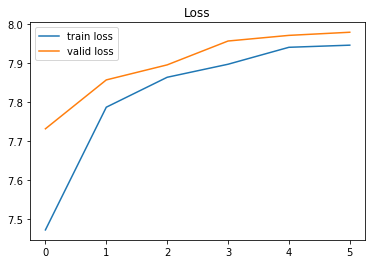

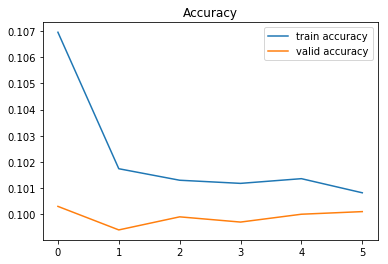

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()